In [7]:
%reload_ext autoreload
%autoreload 2

In [30]:
%cd /Users/rikhoekstra/surfdrive/notebooks/Republic/namen
import sys
!{sys.executable} -m pip install elasticsearch

/Users/rikhoekstra/surfdrive/notebooks/Republic/namen
     |████████████████████████████████| 92kB 2.2MB/s eta 0:00:01


In [9]:
import os
import random
import re
import dateutil
import pandas as pd
import html
from names import common
from lxml import etree
from tarfile import TarFile
from lxml.cssselect import CSSSelector

In [10]:
dfs = {}

In [11]:
for f in os.listdir('/Users/rikhoekstra/Downloads/europa/'):
    fname = os.path.join('/Users/rikhoekstra/Downloads/europa/', f)
    if f[0] != ".":
        nm = f.split(".")[0]
        dfs[nm] = pd.read_csv(fname, sep="\t", quotechar="#", encoding='latin1')

In [12]:
dfs['Personen'] = pd.read_csv(os.path.join('/Users/rikhoekstra/Downloads/europa/','Personen.tsv'),
                              sep="\t", quotechar='#', encoding='utf8')

In [13]:
dfs['Personen']

,PerId,PerAchternaam,PerVoorletters,PerVoornamen,PerTussenvoegsel,PerAdeltitel,PerAdelpredikaat,perTitulatuur,PerGeboortedag,PerGeboortemaand,...,PerGeboorteplaats,PerSterfdag,PerSterfmaand,PerSterfjaar,PerSterfplaats,PerGeslacht,PerSpecFunctie,PerRoepnaam,PerAantekeningen,PerNummer
0,-1776866354,Renaud,W.L.,NaN,NaN,NaN,NaN,NaN,0.0,0.0,...,NaN,0.0,0.0,0.0,NaN,0.0,NaN,NaN,C73; 13-05-1969,1
1,-1776231629,Steenbeek,E.,NaN,NaN,NaN,NaN,Ir.,0.0,0.0,...,NaN,0.0,0.0,0.0,NaN,1.0,NaN,NaN,NaN,2
2,-1773632525,Wijngaarde,E.,NaN,NaN,NaN,NaN,NaN,0.0,0.0,...,NaN,0.0,0.0,0.0,NaN,0.0,NaN,NaN,NaN,3
3,-1771145523,Knobelsdorff,W.E.,Willem Ernest,van,NaN,NaN,drs. baron,15.0,7.0,...,'s-Gravenhage,18.0,4.0,1975.0,Beesterzwaag,1.0,NaN,NaN,NaN,4
4,-1770378611,Nasser,G.A.,Gamal Abdel,NaN,NaN,NaN,NaN,0.0,0.0,...,NaN,28.0,90.0,1970.0,NaN,0.0,NaN,NaN,kolonel; een van de leidende figuren achter de...,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7676,198101257,Boender,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,7677
7677,-1604199969,fran,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7678
7678,-1195612018,Curien,H.,Hubert,NaN,NaN,NaN,NaN,30.0,10.0,...,Cornimont (Vosges),6.0,2.0,2005.0,Loury (Loiret),1.0,NaN,NaN,Frankrijk,7679
7679,-1177945748,Riesenhuber,H.,Heinz,NaN,NaN,NaN,NaN,1.0,12.0,...,Frankfurt am Main,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,7680


In [14]:
personen = dfs['Personen']

In [15]:
personen


,PerId,PerAchternaam,PerVoorletters,PerVoornamen,PerTussenvoegsel,PerAdeltitel,PerAdelpredikaat,perTitulatuur,PerGeboortedag,PerGeboortemaand,...,PerGeboorteplaats,PerSterfdag,PerSterfmaand,PerSterfjaar,PerSterfplaats,PerGeslacht,PerSpecFunctie,PerRoepnaam,PerAantekeningen,PerNummer
0,-1776866354,Renaud,W.L.,NaN,NaN,NaN,NaN,NaN,0.0,0.0,...,NaN,0.0,0.0,0.0,NaN,0.0,NaN,NaN,C73; 13-05-1969,1
1,-1776231629,Steenbeek,E.,NaN,NaN,NaN,NaN,Ir.,0.0,0.0,...,NaN,0.0,0.0,0.0,NaN,1.0,NaN,NaN,NaN,2
2,-1773632525,Wijngaarde,E.,NaN,NaN,NaN,NaN,NaN,0.0,0.0,...,NaN,0.0,0.0,0.0,NaN,0.0,NaN,NaN,NaN,3
3,-1771145523,Knobelsdorff,W.E.,Willem Ernest,van,NaN,NaN,drs. baron,15.0,7.0,...,'s-Gravenhage,18.0,4.0,1975.0,Beesterzwaag,1.0,NaN,NaN,NaN,4
4,-1770378611,Nasser,G.A.,Gamal Abdel,NaN,NaN,NaN,NaN,0.0,0.0,...,NaN,28.0,90.0,1970.0,NaN,0.0,NaN,NaN,kolonel; een van de leidende figuren achter de...,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7676,198101257,Boender,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,7677
7677,-1604199969,fran,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7678
7678,-1195612018,Curien,H.,Hubert,NaN,NaN,NaN,NaN,30.0,10.0,...,Cornimont (Vosges),6.0,2.0,2005.0,Loury (Loiret),1.0,NaN,NaN,Frankrijk,7679
7679,-1177945748,Riesenhuber,H.,Heinz,NaN,NaN,NaN,NaN,1.0,12.0,...,Frankfurt am Main,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,7680


In [16]:
columns={c: c.lower()[3:] for c in personen.columns}


In [17]:
personen=dfs['Personen']
personen.rename(columns=columns, inplace=True)
personen.columns

Index(['id', 'achternaam', 'voorletters', 'voornamen', 'tussenvoegsel',
       'adeltitel', 'adelpredikaat', 'titulatuur', 'geboortedag',
       'geboortemaand', 'geboortejaar', 'geboorteplaats', 'sterfdag',
       'sterfmaand', 'sterfjaar', 'sterfplaats', 'geslacht', 'specfunctie',
       'roepnaam', 'aantekeningen', 'nummer'],
      dtype='object')

In [18]:
personen.rename(columns={'adeltitel':"adellijketitel"}, inplace=True)
personen.adellijketitel = personen.adellijketitel.astype('str')
personen.rename(columns={'titulatuur':'academischetitel'}, inplace=True)
personen.adellijketitel = personen.academischetitel.astype('str')
personen.rename(columns={'roepnaam':'voornaam'}, inplace=True)
personen.adellijketitel = personen.voornaam.astype('str')
personen.rename(columns={'achternaam':'geslachtsnaam'}, inplace=True)
personen.adellijketitel = personen.geslachtsnaam.astype('str')
personen.rename(columns={'sterfjaar':'overlijdensjaar'}, inplace=True)
personen.rename(columns={'sterfplaats':'overlijdensplaats'}, inplace=True)
personen.adellijketitel = personen.overlijdensplaats.astype('str')

In [19]:
personen

,id,geslachtsnaam,voorletters,voornamen,tussenvoegsel,adellijketitel,adelpredikaat,academischetitel,geboortedag,geboortemaand,...,geboorteplaats,sterfdag,sterfmaand,overlijdensjaar,overlijdensplaats,geslacht,specfunctie,voornaam,aantekeningen,nummer
0,-1776866354,Renaud,W.L.,NaN,NaN,nan,NaN,NaN,0.0,0.0,...,NaN,0.0,0.0,0.0,NaN,0.0,NaN,NaN,C73; 13-05-1969,1
1,-1776231629,Steenbeek,E.,NaN,NaN,nan,NaN,Ir.,0.0,0.0,...,NaN,0.0,0.0,0.0,NaN,1.0,NaN,NaN,NaN,2
2,-1773632525,Wijngaarde,E.,NaN,NaN,nan,NaN,NaN,0.0,0.0,...,NaN,0.0,0.0,0.0,NaN,0.0,NaN,NaN,NaN,3
3,-1771145523,Knobelsdorff,W.E.,Willem Ernest,van,Beesterzwaag,NaN,drs. baron,15.0,7.0,...,'s-Gravenhage,18.0,4.0,1975.0,Beesterzwaag,1.0,NaN,NaN,NaN,4
4,-1770378611,Nasser,G.A.,Gamal Abdel,NaN,nan,NaN,NaN,0.0,0.0,...,NaN,28.0,90.0,1970.0,NaN,0.0,NaN,NaN,kolonel; een van de leidende figuren achter de...,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7676,198101257,Boender,NaN,NaN,NaN,nan,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,7677
7677,-1604199969,fran,NaN,NaN,NaN,nan,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7678
7678,-1195612018,Curien,H.,Hubert,NaN,Loury (Loiret),NaN,NaN,30.0,10.0,...,Cornimont (Vosges),6.0,2.0,2005.0,Loury (Loiret),1.0,NaN,NaN,Frankrijk,7679
7679,-1177945748,Riesenhuber,H.,Heinz,NaN,nan,NaN,NaN,1.0,12.0,...,Frankfurt am Main,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,7680


In [20]:
for c in ['geslachtsnaam', 'voorletters', 'voornamen', 'tussenvoegsel',
       'adellijketitel', 'adelpredikaat', 'academischetitel', 'geboorteplaats', 'overlijdensplaats', 'geslacht',
       'specfunctie', 'voornaam', 'aantekeningen', 'nummer']:
    personen[c] = personen[c].astype('str')

In [21]:
values = {'id':0, 'achternaam':'', 'voorletters':'', 'voornamen':'', 'tussenvoegsel':'',
       'adeltitel':'', 'adelpredikaat':'', 'titulatuur':'', 'geboortedag':'',
       'geboortemaand':'', 'geboortejaar':'', 'geboorteplaats':'', 'sterfdag':'',
       'sterfmaand':'', 'sterfjaar':'', 'sterfplaats':'', 'geslacht':'', 'specfunctie':'',
       'roepnaam':'', 'aantekeningen':'', 'nummer':''}
personen.fillna(value=values, inplace=True)

In [24]:
import os
import biodes10
from biodes10 import BioDesDoc
#values = {'id':0, 'achternaam':'', 'voorletters':'', 'voornamen':'', 'tussenvoegsel':'',
#       'adeltitel':'', 'adelpredikaat':'', 'titulatuur':'', 'geboortedag':'',
#       'geboortemaand':'', 'geboortejaar':'', 'geboorteplaats':'', 'sterfdag':'',
#       'sterfmaand':'', 'sterfjaar':'', 'sterfplaats':'', 'geslacht':'', 'specfunctie':'',
#       'roepnaam':'', 'aantekeningen':'', 'nummer':''}
#personen.fillna(value=values, inplace=True)
outdir = "/Users/rikhoekstra/develop/namenindex/europa/out"
if not os.path.exists(outdir):
    os.makedirs(outdir)
template = {'name_publisher':'europa',
            'url_publisher':"http://resources.huygens.knaw.nl/europeseintegratie"}
translations = {"tussenvoegsel":"intrapositie", 
                "id":"local_id",
                "titulatuur":"academischetitel",
                "adeltitel":"adellijketitel"}
possible_arguments = BioDesDoc().possible_arguments
Naam = biodes10.name.Naam

base_url = "http://resources.huygens.knaw.nl/europeseintegratie/persoon/"
def row_to_naam(r, base_url=base_url):
    row.fillna(values, inplace=True)
    prepositie= ''
    intrapositie = ''

    if r.adellijketitel:
        if r.adellijketitel.lower() == 'jonkheer':
            prepositie +=  'jonkheer '
        else:
            intrapositie += r.adellijketitel

    if r.academischetitel:
        prepositie += str(r.academischetitel)

    if r.tussenvoegsel:
        intrapositie += ' ' + r.tussenvoegsel

    prepositie = prepositie.strip()
    intrapositie = intrapositie.strip()
    naam = Naam(
            prepositie=prepositie,
            voornaam=r.voornaam or '' ,
            intrapositie=intrapositie,
            geslachtsnaam=str(r.geslachtsnaam) or '' ,
            )

#    aliassen = [Naam(alias) for alias in r.aliassen]
    names =  [naam]
#    for n in names:
#        assert isinstance(n, Naam), names
#    print ('adding {}'.format(str(names[0])))
    biodesdoc = BioDesDoc()

    if r.geboortedag:
        birth = "{d:02d}-{m:02d}-{y:04d}".format(y=int(r.geboortejaar),
                                     m=int(r.geboortemaand),
                                     d=int(r.geboortedag))
    elif r.geboortejaar == 0:
        birth = None
    else:
        try:
            birth = str(int(r.geboortejaar))
        except ValueError:
            birth = ""
    
    if r.sterfdag:
        death = "{d:02d}-{m:02d}-{y:04d}".format(y=int(r.overlijdensjaar),
                                     m=int(r.sterfmaand),
                                     d=int(r.sterfdag))
    elif r.overlijdensjaar == 0:
        death = None    
    else:
        try:
            death = str(int(r.overlijdensjaar))
        except ValueError:
            death = ""
    
    
#    try:
#        if birth and birth[-1] in [".","?"]:
#            birth = "{:0<4}".format(birth[:3])
#    except TypeError:
#        pass

    
#    try:
#        if death and death[-1] in [".","?"]:
#            death = "{:0<4}".format(death[:3])
#        elif len(death)<4:
#            death = "{:0<4}".format(death[:3])


#        "{y}-{m}-{d}".format(y=r.overlijdensjaar or '0000', 
#                                     m='12',
#                                     d='31')
#        if death.endswith('-01-01') or death.endswith('-12-31'): 
#            death = death[:4]
#    except TypeError:
#        pass
    try:
        birth_place = r.geboorteplaats or ''
        death_place = r.overlijdensplaats or ''
    except:
        birth_place = r.geboorteplaats  or ''
        death_place = r.overlijdensplaats or ''

    biodesdoc.from_args(
        names = names,
        birth_date_text=birth or '',
        birth_place=birth_place or '',
        death_text=death or '',
        death_place = death_place or '',
        url_biografie=os.path.join( base_url, str(r.id)),
        #url_description='Europese Integratie',
        naam_publisher="Europa",
        url_publisher=base_url,
        )
    return biodesdoc
#    self.write_file(biodesdoc, r.id, folder_name=OUT_DIR)

from tqdm import tqdm_notebook
progressbar = tqdm_notebook(total=len(personen))
for i in personen.index:
    row = personen.loc[i]
    #try:     
    doc = row_to_naam(row, base_url=base_url)
    #except (ValueError):
    #    print(i,row)
    fn = "{}.xml".format(row.id)
    flout = os.path.join(outdir, fn)
    doc.to_file(flout)
    progressbar.update()

/Users/rikhoekstra/.local/share/virtualenvs/notebooks-vnr3ZyaR/lib/python3.6/site-packages/ipykernel_launcher.py:124: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


/Users/rikhoekstra/.local/share/virtualenvs/notebooks-vnr3ZyaR/lib/python3.6/site-packages/pandas/core/generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [25]:
import os, tarfile
def compress_output_files(output_folder='', outputfile='out'):
    nm = os.path.join(output_folder, 'out')
    print (nm)
    tar = tarfile.open("%s.tar.gz" % nm, "w:gz")
    fllst = os.listdir(nm)
    progress_bar = tqdm_notebook(total=len(fllst))
    for name in fllst:
        tar.add(nm + "/" + name, arcname=name)
        progress_bar.update()
    tar.close()
    print("written: ", "%s.tar.gz" % nm )

In [26]:
basefolder = "/Users/rikhoekstra/develop/namenindex/europa/"

In [27]:
compress_output_files(output_folder=basefolder)

/Users/rikhoekstra/develop/namenindex/europa/out


/Users/rikhoekstra/.local/share/virtualenvs/notebooks-vnr3ZyaR/lib/python3.6/site-packages/ipykernel_launcher.py:7: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  import sys


written:  /Users/rikhoekstra/develop/namenindex/europa/out.tar.gz


In [28]:
baseurl = "http://resources.huygens.knaw.nl"

In [31]:
basedir = "/Users/rikhoekstra/develop/namenindex/"
srcdirs = ['zekerheid', 'nib', 'kpp', 'europa', 'beaufort', 'bwn'] # not cid for now

from namenindex_recreated import ExtendedIndexItem, convert_sources

df_together = convert_sources(basedir=basedir, srcdirs=srcdirs)

appending:  zekerheid
converting:  zekerheid


appending:  nib
appending:  nib
converting:  nib



appending:  kpp
appending:  kpp
converting:  kpp


appending:  europa
appending:  europa
converting:  europa



appending:  beaufort
appending:  beaufort
converting:  beaufort


appending:  bwn
appending:  bwn
converting:  bwn




In [32]:
dft = df_together.drop_duplicates(keep=False)

In [33]:
dft.drop('_root', axis = 1, inplace=True)

/Users/rikhoekstra/.local/share/virtualenvs/notebooks-vnr3ZyaR/lib/python3.6/site-packages/pandas/core/frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [34]:
dft

,geslachtsnaam,fullname,voornaam,tussenvoegsels,achtervoegsels,birth,death,by,dy,bp,dp,biography,reference,collection,prepositie,intrapositie,birth-place,death-place
0,Roodveldt,Moses I. Roodveldt,,,,None,None,0,0,,,,,zekerheid,NaN,NaN,NaN,NaN
1,Malefijt,Jan Hendrik de Waal Malefijt,,,,None,None,0,0,,,,,zekerheid,NaN,NaN,NaN,NaN
2,Bruggen,Jochum van Bruggen,,,,None,None,0,0,,,,,zekerheid,NaN,NaN,NaN,NaN
3,Vuuren,Adrianus Cornelis Anthonie van Vuuren,,,,None,None,0,0,,,,,zekerheid,NaN,NaN,NaN,NaN
4,Drucker,Hendrik Lodewijk Drucker,,,,None,None,0,0,,,,,zekerheid,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17513,Bijnen,Bijnen,,,,1910,1944,1910,1944,,,<dtml-var bwn_header>\n <p class='genealogie'>...,,bwn,NaN,NaN,NaN,NaN
17514,Beek,Beek,,,,1836,1913,1836,1913,,,<dtml-var bwn_header>\n <p class='genealogie'>...,,bwn,NaN,NaN,NaN,NaN
17515,Graaff,Graaff,,,,1861,1948,1861,1948,,,<dtml-var bwn_header>\n <p class='genealogie'>...,,bwn,NaN,NaN,NaN,NaN
17516,Beaufort,Beaufort,,,,1890,1982,1890,1982,,,<dtml-var bwn_header>\n <p class='genealogie'>...,,bwn,NaN,NaN,NaN,NaN


In [35]:
values = {'geslachtsnaam':'', 'fullname':'', 'birth':0, 'death':0, 'by':0, 'dy':0, 'bp':'', 'dp':'',
       'biography':'', 'reference':'', 'collection':'onbekend', 'prepositie':'', 'voornaam':'',
       'intrapositie':'', 'birth-place':'', 'death-place':''}
dft.fillna(value=values, inplace=True)

/Users/rikhoekstra/.local/share/virtualenvs/notebooks-vnr3ZyaR/lib/python3.6/site-packages/pandas/core/generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [36]:
dft.collection=dft.collection.astype("category")

/Users/rikhoekstra/.local/share/virtualenvs/notebooks-vnr3ZyaR/lib/python3.6/site-packages/pandas/core/generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [37]:
dft['cat_naam'] = dft.geslachtsnaam.astype("category")

/Users/rikhoekstra/.local/share/virtualenvs/notebooks-vnr3ZyaR/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [38]:
tble = dft.groupby(by="cat_naam").aggregate("count")[["geslachtsnaam", "collection"]].sort_values("collection", ascending=False)

In [39]:
tble

,geslachtsnaam,collection
cat_naam,,
,62,62
Vries,30,30
Jong,27,27
Beaufort,24,24
Boer,22,22
...,...,...
Houphouet-Boigny,1,1
House,1,1
Houte,1,1


In [40]:
lst = list(tble.query("geslachtsnaam > 5").index)
lst

['',
 'Vries',
 'Jong',
 'Beaufort',
 'Boer',
 'Visser',
 'Groot',
 'Veen',
 'Smit',
 'Vos',
 'Meijer',
 'Berg',
 'Nasution',
 'Dijk',
 'Bergh',
 'Bakker',
 'Meulen',
 'Houten',
 'Siregar',
 'Jonge',
 'Lennep',
 'Bylandt',
 'Bos',
 'Leeuwen',
 'jr',
 'Polak',
 'Jusuf',
 'Karnebeek',
 'Linden',
 'Brouwer',
 'Lubis',
 'Jacobs',
 'Boissevain',
 'Saleh',
 'Bruyn',
 'Hall',
 'Bosch',
 'Haan',
 'Pierson',
 'Muller',
 'Waal',
 'Dam',
 'Schouten',
 'Lynden',
 'Beelaerts van Blokland',
 'Rutgers',
 'Abdullah',
 'Prins',
 'Graaff',
 'Hogendorp',
 'Cohen',
 'Broek',
 'Rutten',
 'Ali',
 'Posthuma',
 'Koster',
 'Molenaar',
 'Mulder',
 'Bonaparte',
 'Boon',
 'Schaik',
 'Hoek',
 'Zijlstra',
 'Cramer',
 'Fock',
 'Smith',
 'Jansen',
 'Dekker',
 'Scholten',
 'Jahja',
 'Staal',
 'Diepenhorst',
 'Bentinck',
 'Dijkstra',
 'Effendi',
 'Wit',
 'Donner',
 'Gorter',
 'Peters',
 'Achmad',
 'Patijn',
 'Koning',
 'Laan',
 'Kok',
 'Sanders',
 'Klein',
 'Maas',
 'Stork',
 'Rhijn',
 'Hollander',
 'Meyer',
 'Mecklenb

In [41]:
dft.geslachtsnaam = dft.geslachtsnaam.apply(html.unescape)


In [42]:
from bs4 import BeautifulSoup
dft.biography = dft.biography.apply(lambda x:BeautifulSoup(x).text)

In [43]:
import html
html.unescape

<function html.unescape(s)>

In [44]:
dft.to_csv('namen_20ee.csv', sep="\t", quotechar="#")

In [51]:
dubbelen = df_together.loc[(df_together.geslachtsnaam.duplicated(keep=False)) & (~tt.geslachtsnaam.isin(['','jr','sr','jr.','sr.']))].sort_values(['geslachtsnaam','collection'])

In [ ]:
dubbelen.to_csv("/Users/rikhoekstra/Downloads/dubbelepersonen_20ee.csv", sep="\t", quotechar="#")

In [52]:
import requests
bwn = requests.get(" http://www.biografischportaal.nl/personen/biodes?source_id=bwn")

In [53]:
bwn_docs = bwn.content

In [54]:
from lxml import etree

In [93]:
bwndoc = etree.fromstring(bwn_docs)
docs = sel1(bwndoc)
len(docs) # o, dat zijn ze niet allemaal
pers = selp(bwndoc)

XMLSyntaxError: Space required after the Public Identifier, line 1, column 50 (<string>, line 1)

In [ ]:
# first we need selectors. For these files the following seem to be enough
sel1 = CSSSelector("fileDesc")
sel2 = CSSSelector("ref")
sel3 = CSSSelector("persName")
sel4 = CSSSelector("biography text")
selp = CSSSelector("person")

#test some

ref = sel2(root)[0]
url = ref.get("target")
print(url.split('/')[-2:])
s4 = sel4(root)[0]
s4.text

In [ ]:
ref = sel2(docs[1])

In [ ]:
for e in ref:
    print(etree.tostring(e))

In [ ]:
etree.tostring(docs[43])

In [ ]:
for p in pers[:10]:
    print(etree.tostring(p))

In [ ]:
sel = CSSSelector("a[href]")
selid = CSSSelector("idno")
import re

In [ ]:
bwnlist = requests.get('http://resources.huygens.knaw.nl/bwn1880-2000/biodes/list')

In [ ]:
lst = etree.fromstring(bwnlist.content)

In [ ]:
llst = sel(lst)

In [ ]:
etree.tostring(llst[0])

In [ ]:
e = llst[0]

In [ ]:
url = e.get('href')

In [ ]:
bwndir = os.path.join(basedir,'bwn/out')
os.makedirs(bwndir)

In [ ]:
i = 0 # to be sure
for e in llst:
    i += 1
    url = e.get('href')
    doc = call_api(url)
    nm = str(i)
    outnm = os.path.join(bwndir, nm + ".xml")
    with open(outnm, 'wb') as outfl:
        outfl.write(doc.content)

In [ ]:
1800/10

In [ ]:
from ratelimit import limits, sleep_and_retry

import requests

THIRTY_MINUTES = 180

@sleep_and_retry
@limits(calls=3000, period=THIRTY_MINUTES)
def call_api(url):
    response = requests.get(url)

    if response.status_code != 200:
        raise Exception('API response: {}'.format(response.status_code))
    return response

In [ ]:
sel3


In [ ]:
fls = os.listdir(bwndir)[:40]

In [ ]:
from namenindex_recreated import TUSSENVOEGSELS
TUSSENVOEGSELS.sort(key=lambda x: len(x))
TUSSENVOEGSELS.reverse()
def find_tussenvoegels(s):
    s = s.strip()
    tussenvoegsels = []
    for tussenvoegsel in TUSSENVOEGSELS:
        if s.startswith(tussenvoegsel +  ' ' ):
            s = s[len(tussenvoegsel):]
            s = self._strip_tussenvoegels(s)
        else:       
            new_s = s.replace(" %s" % tussenvoegsel, '')
            if  new_s != s:
                tussenvoegsels.append(tussenvoegsel)
            s = new_s
    return (' '. join(tussenvoegsels), s.strip())

In [ ]:
TUSSENVOEGSELS.sort(key=lambda x: len(x))
TUSSENVOEGSELS.reverse()
TUSSENVOEGSELS

In [ ]:
bwn
   

In [ ]:
eii.get_names()
    

In [55]:
sel = CSSSelector('name')

In [56]:
for n in sel(root):
    print (n.text + n.tail)

NameError: name 'root' is not defined

In [48]:
selcols = dft[['by', 'dy', 'geslachtsnaam']]

In [50]:
tt = dft.loc[selcols.duplicated(keep=False)].sort_values('geslachtsnaam')[['geslachtsnaam', 'fullname', 'by','dy']]

In [59]:
gelijken = tt.loc[~tt.geslachtsnaam.isin(['','jr','sr','jr.','sr.'])]

In [ ]:
dft.loc[gelijken.index]

In [ ]:
dft.loc[gelijken.index].groupby('geslachtsnaam').max().reset_index()

In [ ]:
dft

In [60]:
unique_names = gelijken.geslachtsnaam.unique()
len(unique_names)

1343

In [ ]:
common_pers

In [62]:
common_pers_zonder_nib = dft.loc[~dft.collection.isin(['nib'])].sort_values('geslachtsnaam').copy()
common_pers_zonder_nib.loc[dft.collection=='nib']

,geslachtsnaam,fullname,voornaam,tussenvoegsels,achtervoegsels,birth,death,by,dy,bp,dp,biography,reference,collection,prepositie,intrapositie,birth-place,death-place,cat_naam


In [63]:
tabbed_df_zonder_nib = common_pers_zonder_nib.groupby(['geslachtsnaam', 'collection']).size().unstack(fill_value='').astype(str) 
#tabbed_df.columns = tabbed_df.columns.astype('Int64') # dat ziet er normaler uit
tabbed_df_zonder_nib.loc[tabbed_df_zonder_nib.europa=='1']

collection,beaufort,kpp,bwn,europa,zekerheid
geslachtsnaam,,,,,
Aalberse,1,,2,1,1
Aantjes,,,,1,
Aarden,,,1,1,
Aardenne,,,,1,
Aarsse,,,,1,
...,...,...,...,...,...
wnd. hoofd DIO/EZ,,,,1,
wnd. hoofd FEZ,,,,1,
wnd. regeringscommissaris,,,,1,


In [64]:
tabbed_df_zonder_nib.to_csv('common_20thc_pers_abbrev_zonder_nib_europa.csv', sep="\t", encoding="utf8")

In [65]:
tabbed_all = dft.groupby(['geslachtsnaam', 'collection']).size().unstack(fill_value='').astype(str) 

In [ ]:
tabbed_all.to_csv('20eepersonen.csv', sep="\t", encoding="utf8")

In [66]:
bwnref = dft.loc[(dft.collection == 'bwn') & (dft.geslachtsnaam.isin(unique_names))].sort_values("geslachtsnaam")

In [68]:
from collections import Counter
Counter(bwnref['geslachtsnaam']).most_common()

[('Jong', 10),
 ('Vries', 9),
 ('Polak', 8),
 ('Smit', 6),
 ('Bergh', 5),
 ('Groot', 5),
 ('Meijer', 5),
 ('Visser', 5),
 ('Beaufort', 4),
 ('Boer', 4),
 ('Boissevain', 4),
 ('Broek', 4),
 ('Cohen', 4),
 ('Gelder', 4),
 ('Haan', 4),
 ('Hall', 4),
 ('Naber', 4),
 ('Andriessen', 3),
 ('Cramer', 3),
 ('Dijk', 3),
 ('Elias', 3),
 ('Fock', 3),
 ('Gorter', 3),
 ('Haas', 3),
 ('Hamel', 3),
 ('Hoek', 3),
 ('Hollander', 3),
 ('Knuttel', 3),
 ('Meulen', 3),
 ('Mulder', 3),
 ('Rees', 3),
 ('Rutgers', 3),
 ('Rutten', 3),
 ('Röell', 3),
 ('Savornin Lohman', 3),
 ('Schokking', 3),
 ('Thiel', 3),
 ('Treub', 3),
 ('Veen', 3),
 ('Aalberse', 2),
 ('Anema', 2),
 ('Bakker', 2),
 ('Berg', 2),
 ('Blom', 2),
 ('Bolkestein', 2),
 ('Boon', 2),
 ('Bos', 2),
 ('Bosch', 2),
 ('Brouwer', 2),
 ('Burgers', 2),
 ('Dam', 2),
 ('Diepenhorst', 2),
 ('Dijkstra', 2),
 ('Donner', 2),
 ('Eeghen', 2),
 ('Eijk', 2),
 ('Einthoven', 2),
 ('Fabius', 2),
 ('Gosses', 2),
 ('Graaff', 2),
 ('Hamburger', 2),
 ('Hart', 2),
 ('Hartog',

In [69]:
bwn = dft.loc[dft.collection == 'bwn'].copy()

In [70]:
zekerheid = dft.loc[dft.collection == 'zekerheid'].copy()

In [71]:
europa = dft.loc[dft.collection == 'europa'].copy()

In [72]:
zekerheid_bwn = zekerheid.merge(bwn,on="geslachtsnaam")[['geslachtsnaam',
                                        'fullname_x', 'fullname_y',
                                        'by_x', 'by_y', 'dy_x', 'dy_y']]

In [73]:
zekerheid_bwn.fullname_x=zekerheid_bwn.fullname_x.apply(html.unescape)
zekerheid_bwn

,geslachtsnaam,fullname_x,fullname_y,by_x,by_y,dy_x,dy_y
0,Berghuis,Wiert Pauwel Berghuis,Berghuis,0,1911,0,1989
1,Oud,Pieter Jacobus Oud,Oud,0,1890,0,1963
2,Oud,Pieter Jacobus Oud,Oud,0,1886,0,1968
3,Bruijn,Adrianus Cornelis de Bruijn,Bruijn,0,1887,0,1968
4,Fabius,Dammes Paulus Dirk Fabius,Fabius,0,1851,0,1931
...,...,...,...,...,...,...,...
88,Schaper,Johan Hendrik Andries Schaper,Schaper,0,1906,0,1996
89,Pekelharing,Baltus Hendrik Pekelharing,Pekelharing,0,1841,0,1922
90,Ariëns,Alphonse Marie Auguste Ariëns,Ariëns,0,1860,0,1928
91,Albers,Jan W. Albers,Albers,0,1866,0,1926


In [ ]:
zekerheid_bwn.to_excel('zekerheid_bwn.xlsx')

In [74]:
dft.loc[gelijken.index].groupby('geslachtsnaam').max().reset_index()

,geslachtsnaam,fullname,voornaam,tussenvoegsels,achtervoegsels,bp,dp,biography,reference,prepositie,intrapositie,birth-place,death-place
0,Aalberse,nan nan nan nan Aalberse,nan,,,,,"katholiek politicus en jurist, lid van de Twee...",,nan,nan nan,nan,nan
1,Aarts,pater nan nan nan Aarts,nan,,,,,,,pater,nan nan,nan,nan
2,Abbas Siregar,"Abbas Siregar, Abdul (2)",,,,,,"Mr., hoofd van de Indonesische politie te Medan.",,,,,
3,Abbey,Welbeck Abbey,,,,,,lbeck Abbey (residentie van de hertogen van Po...,,,,,
4,Abdul Karim,"Abdul Karim, Mas Endun",,,,,,Leider van de P.K.I.-Sumatra.,,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1338,Zuylen van Nyevelt,"Zuylen van Nyevelt, J.Ph.J.A. graaf van",,,,,,gemeenteraadslid te 's-Gravenhage in 1905,,,,,
1339,Zwaag,Zwaag,,,,,,Redacteur De Klok 1888-1913. Van Van der Zwaag...,"verder J.J. Kalma, <i> G.L. van der Zwaag (185...",,,,
1340,Zwaan,nan nan nan nan Zwaan,nan,,,,,"theoloog en hervormd predikant, buitengewoon h...",,nan,nan nan,nan,nan
1341,keizer,Rusland >> keizer,,,,,,sland >> keizer (tsaar),,,,,


In [75]:
bwn.loc[bwn.geslachtsnaam == "Oud"]

,geslachtsnaam,fullname,voornaam,tussenvoegsels,achtervoegsels,birth,death,by,dy,bp,dp,biography,reference,collection,prepositie,intrapositie,birth-place,death-place,cat_naam
17130,Oud,Oud,,,,1890,1963,1890,1963,,,"\n\nOud, Jacobus Johannes Pieter, architect (P...",,bwn,,,,,Oud
17260,Oud,Oud,,,,1886,1968,1886,1968,,,"\n\nOud, Pieter Jacobus, politicus en bestuurd...",,bwn,,,,,Oud


In [ ]:
print(bwn.loc[bwn.index == 17130][['biography']])

In [ ]:
personen

In [77]:
reldoc = dfs['RelDocPersonen']
reldoc.columns

Index(['DopDocumenten', 'DopPersonen', 'DopId'], dtype='object')

In [211]:
documenten = dfs['Documenten']

In [78]:
counted_docs = reldoc.groupby(by=reldoc.DopPersonen).aggregate("count").sort_values("DopDocumenten", ascending=False)
counted_docs.head()

,DopDocumenten,DopId
DopPersonen,,
7.170000e+02,527,527
8.800000e+01,359,359
3.700000e+01,348,348
1.446016e+09,303,303
9.333231e+08,300,300


In [80]:
toppersonen = counted_docs.loc[counted_docs.DopDocumenten > 2].index

In [81]:
docs = {}
for i in toppersonen:
    r = reldoc.loc[reldoc.DopPersonen == i]['DopDocumenten']
    docs[i] = set(r)

In [82]:
len(docs)

1176

In [83]:
def merge(lsts): 
    sets = [set(lst) for lst in lsts if lst]
    merged = True
    while merged:
        merged = False
        results = []
        while sets:
            common, rest = sets[0], sets[1:]
            sets = []
            for x in rest:
                if x.isdisjoint(common):
                    sets.append(x)
                else:
                    merged = True
                    common |= x
            results.append(common)
        sets = results
    return sets

In [84]:
from itertools import tee 
def pairwise(iterable):
    a, b = tee(iterable)
    next(b, None)
    return zip(a, b)

def check_overlap(a,b, minlen=1):
    overlap = set(a) & set(b)
    if len(overlap) >= minlen:
        return overlap



In [201]:
docs

{717.0: {-2145289792.0,
  -2144026201.0,
  -2143365262.0,
  -2125116798.0,
  -2118397729.0,
  -2100605389.0,
  -2076371260.0,
  -2059992829.0,
  -2050232270.0,
  -2048446837.0,
  -2041346696.0,
  -2037931730.0,
  -2026501560.0,
  -2022936488.0,
  -1997750038.0,
  -1996315486.0,
  -1994004125.0,
  -1969056201.0,
  -1962415654.0,
  -1916877644.0,
  -1913862317.0,
  -1912113884.0,
  -1911117394.0,
  -1905209830.0,
  -1902992710.0,
  -1895804855.0,
  -1892950586.0,
  -1885821659.0,
  -1882205513.0,
  -1879856192.0,
  -1879645365.0,
  -1876085344.0,
  -1870783896.0,
  -1866918238.0,
  -1834665415.0,
  -1820900431.0,
  -1783417201.0,
  -1777458497.0,
  -1711273750.0,
  -1706761022.0,
  -1684552561.0,
  -1677814481.0,
  -1671909535.0,
  -1657180174.0,
  -1646835505.0,
  -1640118596.0,
  -1637020991.0,
  -1635187733.0,
  -1631866246.0,
  -1625000040.0,
  -1619546587.0,
  -1609754048.0,
  -1592285650.0,
  -1583713854.0,
  -1540664272.0,
  -1536258030.0,
  -1510111350.0,
  -1497376811.0,
  -1492

In [94]:
pairs = list(pairwise(docs.keys()))
overlaps = {}
for pair in pairs:
    overlap = check_overlap(docs[pair[0]], docs[pair[1]])
    if overlap:
        overlaps[pair] = overlap
    

In [86]:
len(overlaps.keys())

98

In [87]:
reldoc.loc[reldoc.DopPersonen == 88]['DopDocumenten']

51      -7.283947e+08
65      -1.974083e+09
76       1.125875e+09
118     -2.629649e+08
130      1.388457e+09
             ...     
22331    8.908256e+08
22388   -1.122764e+09
22417   -8.395155e+08
22536   -5.213862e+08
22608    1.230289e+09
Name: DopDocumenten, Length: 359, dtype: float64

In [88]:
list(personen.loc[personen.id == int(88.0)]['geslachtsnaam'])[0]


'Spierenburg'

In [89]:
pairlist = [(list(personen.loc[personen.id == int(key[0])]['geslachtsnaam'])[0],
 list(personen.loc[personen.id == int(key[1])]['geslachtsnaam'])[0]) for key in overlaps.keys()]

In [102]:
pairlist

[('Spaak', 'Spierenburg'),
 ('Spierenburg', 'Mansholt'),
 ('Mansholt', 'Gaulle'),
 ('Gaulle', 'Hallstein'),
 ('Hallstein', 'Monnet'),
 ('Monnet', 'Adenauer'),
 ('Adenauer', 'Beyen'),
 ('Beyen', 'Luns'),
 ('Luns', 'Linthorst Homan'),
 ('Linthorst Homan', 'Schuman'),
 ('Schuman', 'Couve de Murville'),
 ('Couve de Murville', "Giscard d'Estaing"),
 ('Stikker', 'Zeeland'),
 ('Zeeland', 'Beugel'),
 ('Beugel', "Snoy et d'Oppuers"),
 ("Snoy et d'Oppuers", 'Thorn'),
 ('Bech', 'Brandt'),
 ('Brandt', 'Schmidt'),
 ('Marjolin', 'Erhard'),
 ('Pompidou', 'Rey'),
 ('Blaisse', 'Zijlstra'),
 ('Bidault', 'Heath'),
 ('Heath', 'Fanfani'),
 ('Ortoli', 'Colombo'),
 ('Colombo', 'Wilson'),
 ('Wilson', 'Alphand'),
 ('Pflimlin', 'Suetens'),
 ('Uyl', 'Stoel'),
 ('Stoel', 'Biesheuvel'),
 ('Biesheuvel', 'Sassen'),
 ('Sassen', 'Lardinois'),
 ('Lardinois', 'Schumann'),
 ('Brentano di Tremezzo', 'Lahr'),
 ('Uri', 'Müller-Armack'),
 ('Müller-Armack', 'Pous'),
 ('Pous', 'MacMillan'),
 ('MacMillan', 'Kohnstamm'),
 ('Pell

In [144]:
pers = [list(personen.loc[personen.id == int(key[1])]['geslachtsnaam'])[0] for key in overlaps.keys()]

In [145]:
import networkx
g = networkx.Graph()
g.add_nodes_from(pers)



In [146]:
for key in overlaps.keys():
    res = ((list(personen.loc[personen.id == int(key[0])]['geslachtsnaam'])[0],
 list(personen.loc[personen.id == int(key[1])]['geslachtsnaam'])[0]))
    g.add_edge(res[0],res[1], weight=len(overlaps[key]))


In [118]:
import matplotlib.pyplot as plt

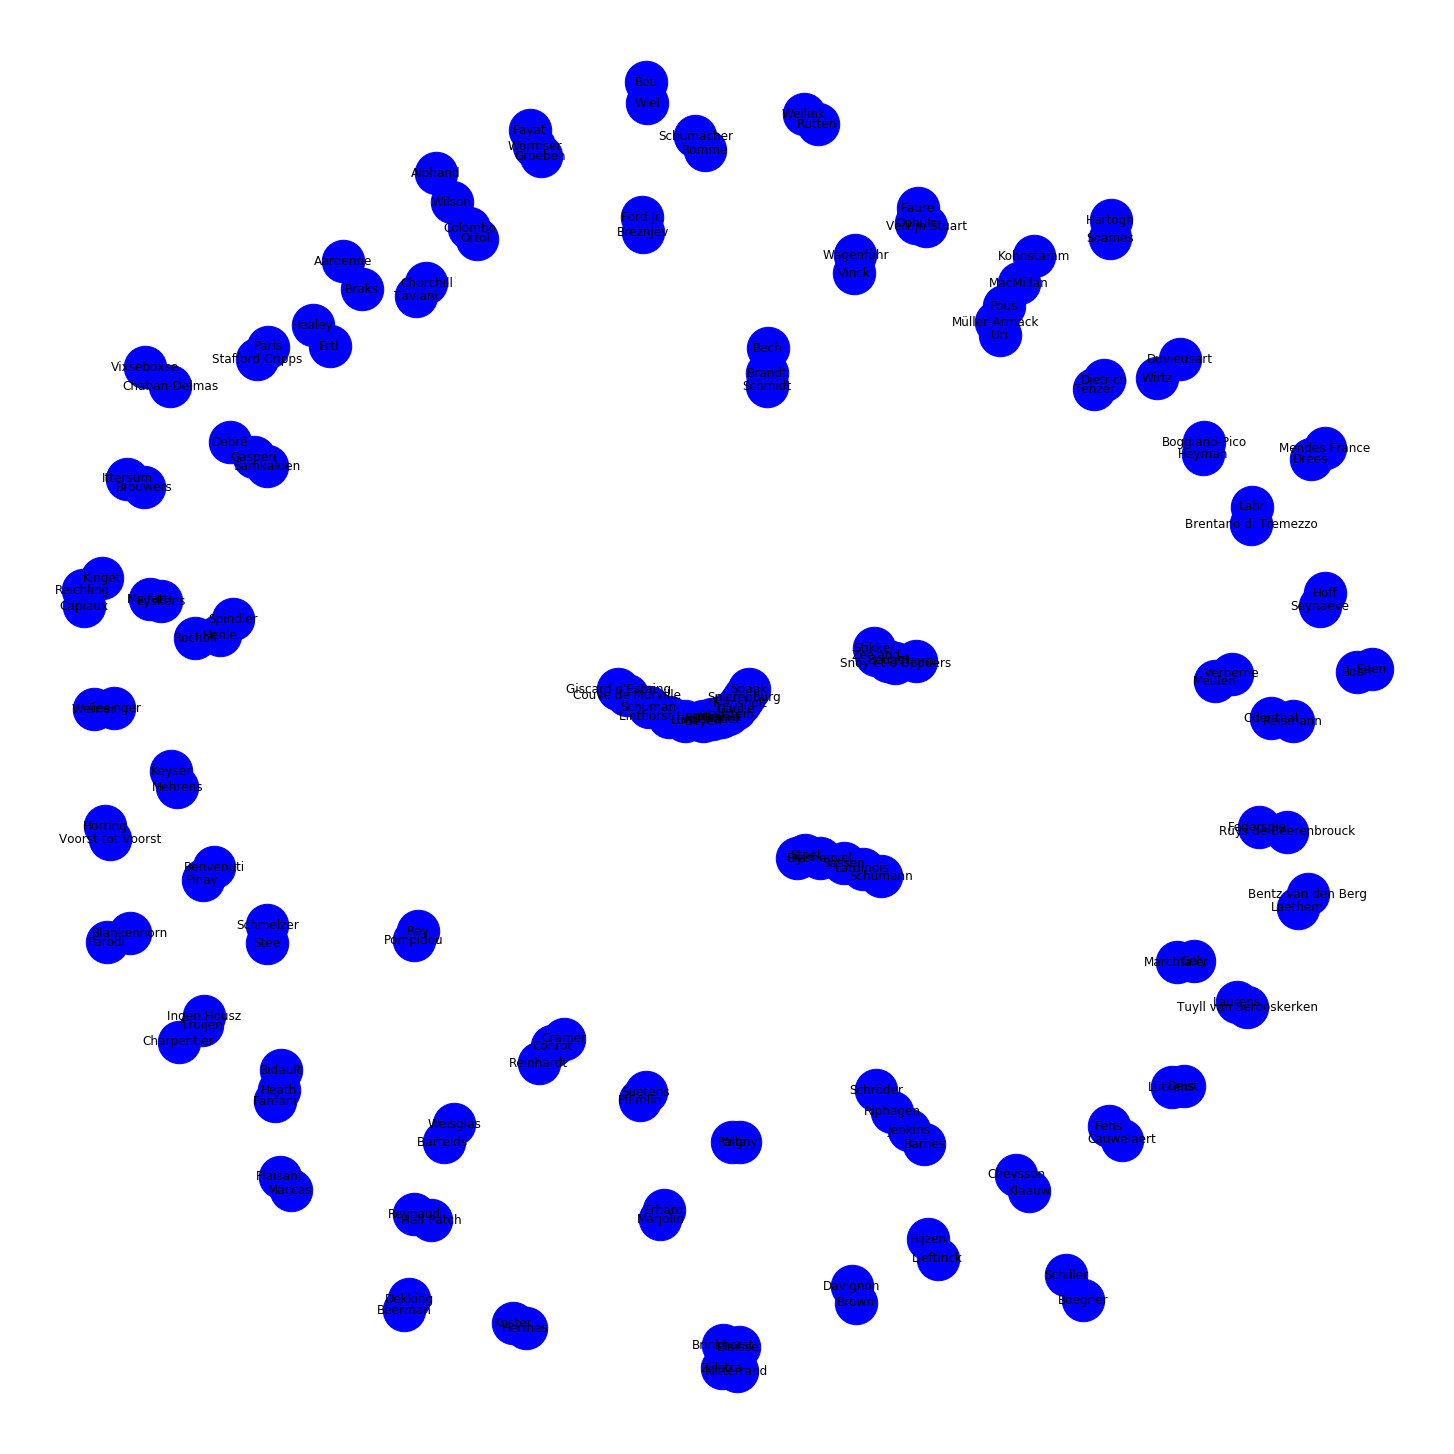

In [124]:
fig = plt.figure(edgecolor="white", figsize=(20,20))
networkx.draw(g, 
              with_labels=True, 
              node_color='blue', 
              node_size=1800, edge_color='black')




#networkx.draw(g, with_labels=True, font_weight='bold')

In [202]:
g.adjacency()
pos=networkx.layout.fruchterman_reingold_layout(g) 
pos

{'Spierenburg': array([-0.00192663, -0.07959846]),
 'Mansholt': array([-0.01030297, -0.08560838]),
 'Gaulle': array([-0.02448105, -0.09759657]),
 'Hallstein': array([-0.03310572, -0.10858311]),
 'Monnet': array([-0.03912738, -0.12215111]),
 'Adenauer': array([-0.03812128, -0.13440281]),
 'Beyen': array([-0.02952758, -0.14802312]),
 'Luns': array([-0.00270481, -0.16583827]),
 'Linthorst Homan': array([ 0.02758978, -0.176206  ]),
 'Schuman': array([ 0.06890311, -0.18241347]),
 'Couve de Murville': array([ 0.11421475, -0.17976508]),
 "Giscard d'Estaing": array([ 0.13231896, -0.17928834]),
 'Zeeland': array([-0.13112739, -0.03099011]),
 'Beugel': array([-0.15102461, -0.0433425 ]),
 "Snoy et d'Oppuers": array([-0.16297592, -0.04933551]),
 'Thorn': array([-0.19540428, -0.06174779]),
 'Brandt': array([0.29542797, 0.17522463]),
 'Schmidt': array([0.28957933, 0.16057998]),
 'Erhard': array([-0.01431266, -0.94078072]),
 'Rey': array([0.74822098, 0.44988465]),
 'Zijlstra': array([-0.02760738,  0.

In [108]:
import plotly.graph_objects as go


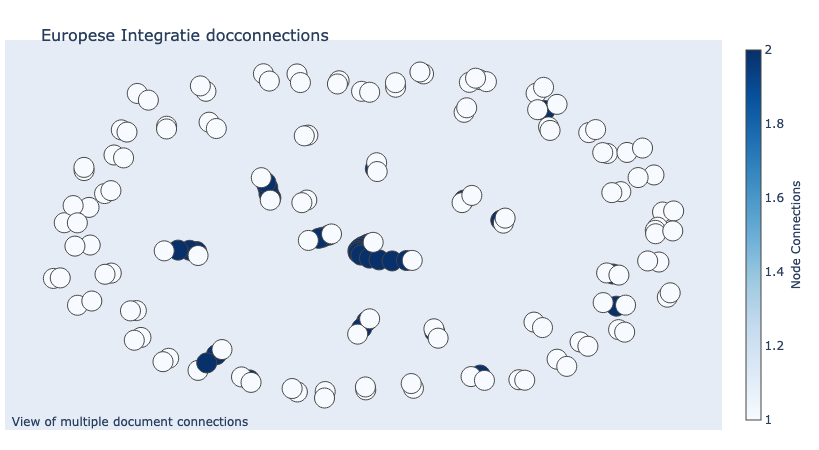

In [204]:
labels=pers
edge_x = []
edge_y = []
for edge in g.edges():
    x0, y0 = pos[edge[0]]
    x1, y1 = pos[edge[1]]
    edge_x.append(x0)
    edge_x.append(x1)
    edge_x.append(None)
    edge_y.append(y0)
    edge_y.append(y1)
    edge_y.append(None)

edge_trace = go.Scatter(
    x=edge_x, y=edge_y,
    line=dict(width=1, color='#888'),
    hoverinfo='none',
    mode='lines')

node_x = []
node_y = []
node_texts = []
for node in g.nodes():
    x, y = pos[node]
    node_x.append(x)
    node_y.append(y)
    node_texts.append(node)
    

node_trace = go.Scatter(
    x=node_x, y=node_y,
    mode='markers',
    hoverinfo='text',
    text=node,
    marker=dict(
        showscale=True,
        # colorscale options
        #'Greys' | 'YlGnBu' | 'Greens' | 'YlOrRd' | 'Bluered' | 'RdBu' |
        #'Reds' | 'Blues' | 'Picnic' | 'Rainbow' | 'Portland' | 'Jet' |
        #'Hot' | 'Blackbody' | 'Earth' | 'Electric' | 'Viridis' |
        colorscale='Blues',
        reversescale=False,
        color=[],
        size=20,
        colorbar=dict(
            thickness=15,
            title='Node Connections',
            xanchor='left',
            titleside='right'
        ),
        line_width=1))

node_adjacencies = []
node_text = []
for node, adjacencies in enumerate(g.adjacency()):
    node_adjacencies.append(len(adjacencies[1]))
    node_text.append('%s (%s)' % (node_texts[node], str(len(adjacencies[1])) ))

node_trace.marker.color = node_adjacencies
node_trace.text = node_text

fig = go.Figure(data=[edge_trace, node_trace],
             layout=go.Layout(
                title='<br>Europese Integratie docconnections',
                titlefont_size=16,
                showlegend=False,
                hovermode='closest',
                margin=dict(b=20,l=5,r=5,t=40),
                annotations=[ dict(
                    text="View of multiple document connections",
                    showarrow=False,
                    xref="paper", yref="paper",
                    x=0.005, y=-0.002 ) ],
                xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                yaxis=dict(showgrid=False, zeroline=False, showticklabels=False))
                )
fig.show()

In [225]:
for p in docs[717.0]:
    print(list(personen.loc[personen.id == int(p)]['geslachtsnaam']))

TypeError: 'set' object is not subscriptable

In [232]:
personen.loc[personen.id==-2145289792]

,id,geslachtsnaam,voorletters,voornamen,tussenvoegsel,adellijketitel,adelpredikaat,academischetitel,geboortedag,geboortemaand,...,geboorteplaats,sterfdag,sterfmaand,overlijdensjaar,overlijdensplaats,geslacht,specfunctie,voornaam,aantekeningen,nummer


In [226]:
docs[717.0]

{-2145289792.0,
 -2144026201.0,
 -2143365262.0,
 -2125116798.0,
 -2118397729.0,
 -2100605389.0,
 -2076371260.0,
 -2059992829.0,
 -2050232270.0,
 -2048446837.0,
 -2041346696.0,
 -2037931730.0,
 -2026501560.0,
 -2022936488.0,
 -1997750038.0,
 -1996315486.0,
 -1994004125.0,
 -1969056201.0,
 -1962415654.0,
 -1916877644.0,
 -1913862317.0,
 -1912113884.0,
 -1911117394.0,
 -1905209830.0,
 -1902992710.0,
 -1895804855.0,
 -1892950586.0,
 -1885821659.0,
 -1882205513.0,
 -1879856192.0,
 -1879645365.0,
 -1876085344.0,
 -1870783896.0,
 -1866918238.0,
 -1834665415.0,
 -1820900431.0,
 -1783417201.0,
 -1777458497.0,
 -1711273750.0,
 -1706761022.0,
 -1684552561.0,
 -1677814481.0,
 -1671909535.0,
 -1657180174.0,
 -1646835505.0,
 -1640118596.0,
 -1637020991.0,
 -1635187733.0,
 -1631866246.0,
 -1625000040.0,
 -1619546587.0,
 -1609754048.0,
 -1592285650.0,
 -1583713854.0,
 -1540664272.0,
 -1536258030.0,
 -1510111350.0,
 -1497376811.0,
 -1492158855.0,
 -1480644065.0,
 -1474567802.0,
 -1463816828.0,
 -146374

In [222]:
list(docs.keys())[:10]

[717.0, 88.0, 37.0, 1446016100.0, 933323115.0, 535.0, 1531.0, 49.0, 1.0, 417.0]

In [219]:
documenten

,DocId,DocNummer,DocDag,DocMaand,DocJaar,DocBeschrijving,DocMargeaantekeningen,DocMargeAantekeningenMemo,DocEersteRonde,DocTweedeRonde,DocDerdeRonde,DocOpgenomen,CreatedBy,DateModified,DateCreated,UserModifiedBy,DocSoort,DocBoekdeel,DocZieOok,DocPDF
0,1232975510,D00001,29.0,1.0,1957,"Brief van de Ambassade te Parijs, Economische ...",1,\n\nOS: B00885,NaN,NaN,NaN,1,Admin,0000-00-00 00:00:00,0000-00-00 00:00:00,Admin,346283103,0,1,1.0
1,1240410727,D00002,15.0,7.0,1958,Betreft de associatie van Nieuw Guinea aan de ...,1,\r\n\r\nOS: K00544,NaN,NaN,NaN,0,Admin,2009-01-26 14:42:15,2009-01-26 14:37:10,Admin,-1243415012,0,0,NaN
2,-237603895,D00003,17.0,2.0,1959,Brief betreffende Mandaat voor de Europese Com...,1,\r\n\r\nOS: B000219,NaN,NaN,NaN,0,Admin,2009-01-28 15:22:01,2009-01-26 16:40:44,Admin,346283103,0,0,NaN
3,1232974519,S00001,10.0,7.0,1945,6. Nota goedkeuring Nederlandsch-Fransch-Belgi...,0,NaN,NaN,NaN,NaN,0,Admin,2011-07-14 09:49:58,2009-01-26 13:26:14,Admin,879285292,0,1,1.0
4,1228607184,S00002,21.0,10.0,1946,3. Lieftinck meent dat bijzondere betekenis m...,0,NaN,NaN,NaN,NaN,0,Admin,2011-04-18 16:50:18,2009-01-26 14:31:59,Admin,879285292,0,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7853,1392727119,S03734,27.0,7.0,1959,81. Luns en Cals hadden tijdens de EEG/Euratom...,1,NaN,NaN,NaN,NaN,1,Admin,0000-00-00 00:00:00,0000-00-00 00:00:00,Admin,-1243415012,0,1,1.0
7854,1589815090,S03759,2.0,7.0,1964,71/64. Op 1 juli werd gesproken met de Duitse ...,1,NaN,NaN,NaN,NaN,1,Admin,0000-00-00 00:00:00,0000-00-00 00:00:00,Admin,-1243415012,0,1,1.0
7855,1407312943,S03778,14.0,2.0,1947,Brief Spierenburg aan Hirschfeld met als bijla...,1,NaN,NaN,NaN,NaN,1,Admin,0000-00-00 00:00:00,0000-00-00 00:00:00,Admin,1000615370,0,1,1.0
7856,309810756,S03779,6.0,6.0,1945,Van Haersma de With aan Van Kleffens.\nBrief b...,1,NaN,NaN,NaN,NaN,1,Admin,0000-00-00 00:00:00,0000-00-00 00:00:00,Admin,346283103,0,1,1.0


In [208]:
g2 = networkx.Graph()
g2.add_nodes_from(list(docs.keys()))
for key in docs.keys():
    for p in docs[key]:
        res = (key, (list(personen.loc[personen.id == int(p)]['geslachtsnaam'])[0]))
    g.add_edge(res[0],res[1], weight=len(overlaps[key]))


NodeView((717.0, 88.0, 37.0, 1446016100.0, 933323115.0, 535.0, 1531.0, 49.0, 1.0, 417.0, 1205.0, -766710642.0, 240737951.0, 7.0, 133137813.0, 103.0, 1700197745.0, 2053846249.0, -19423473.0, -1174473105.0, -1771814119.0, -42088299.0, 201.0, 1525.0, 1098192886.0, -1754123644.0, 570.0, 264.0, 33.0, 430741887.0, 1094041534.0, -546800256.0, 901523451.0, 1774041530.0, -1113173182.0, 1987027279.0, 605486418.0, -509120260.0, -1610902838.0, 159809826.0, 1493.0, 647251412.0, 265.0, 174.0, -866178347.0, -1699407577.0, 149050007.0, 207.0, -69693462.0, 909229721.0, 1107371156.0, 576977972.0, 76.0, 1529.0, 487.0, 674.0, -997453205.0, 1020839856.0, 94.0, -2000251276.0, 1361.0, 131784758.0, 806.0, 1247692411.0, 1088.0, 66.0, -196164627.0, -1943001384.0, -2043856440.0, -504565004.0, -765340450.0, 1079305067.0, -132710710.0, -431900663.0, 1017733087.0, -1619280098.0, 159.0, -2084397800.0, 251459201.0, 1530.0, 545.0, -364572268.0, -1972775275.0, -1378203009.0, 1119279118.0, 747859109.0, -1107332530.0, 15

In [215]:
jsonresponse = requests.get("https://metagrid.ch/metagrid_search-2/#/concordance/79629.json")

In [218]:
jsonresponse.json()

JSONDecodeError: Expecting value: line 1 column 1 (char 0)

In [ ]:
[(key[0], key[1]) for key in overlaps.keys()]

In [ ]:
pers_doc = counted_docs.merge(personen, left_on="DopPersonen", right_on="id")[[ "DopDocumenten", *personen.columns, ]]
pers_doc

In [ ]:
reldoc.columns

In [ ]:
len(pers_doc.loc[pers_doc.DopDocumenten > 5])/len(pers_doc)*100

In [ ]:
counted = reldoc.groupby(by=reldoc.DopDocumenten).aggregate("count").sort_values("DopPersonen", ascending=False)
counted.loc[counted.DopPersonen.isin(range(4, 7))].DopDoumenten

In [ ]:
from collections import Counter
l = [".".join(g.map(str)) for g in reldoc.groupby(by=reldoc.DopDocumenten).groups.values() ]

In [ ]:
c=Counter(l)
c.most_common(20)

In [ ]:
europa

In [ ]:
# Run this cell to import the necessary libraries and initiate an Elasticsearch object.
from elasticsearch import Elasticsearch
from elasticsearch.exceptions import RequestError
import datetime

import json
from IPython.core.display import display, HTML
import re

es = Elasticsearch(timeout=30, max_retries=10, retry_on_timeout=True) 

In [ ]:
es.indices.create('testnamenindex')

In [ ]:
# create mapping in index (the index should already exist)
index = 'testnamenindex'

request_body = {   
            "naam": {
                    "properties":{
                        'geslachtsnaam': {"type":"string"},
                        'fullname': {"type":"string"},
                        'birth': {"type":"string"},
                        'death': {"type":"string"},
                        'by': {"type":"integer"},
                        'dy': {"type":"integer"},
                        'bp': {"type":"string"},
                        'dp': {"type":"string"},
                        'biography': {"type":"text"},
                        'reference': {"type":"string"}
                    }
                },
    }

INDEX_NAME=index
es.indices.put_mapping(index = index, doc_type="naam",  body = request_body)
    
# check mapping
es.indices.get_mapping(index = index)

In [ ]:
dft.to_json('20eenamen_no_cid.json')

In [ ]:
import sys; sys.path.insert(0, "/Users/rikhoekstra/develop/namenindexserver/helpers/")

In [ ]:
import namen_to_es

In [ ]:
namen_to_es.main(basedir=".", index="testnamenserver", doc_type="naam", srcfile="20eenamen_no_cid.json", mapping=request_body)

In [ ]:
es.